# 1. Attribute selection in classification problems

### Curse of dimensionality

**Question** What is "curse of dimensionality"? What does it mean in practice?

Im więcej jest atrybutów, tym modele mają trudniej się nauczyć co jest istotne. Liczba obserwacji żądanych w stosunku do zmiennej wzrasta
wykładniczo z liczbą zmiennych.

**Question** How can we reduce the number of attributes in classification problems?

Poprzez selekcję albo ekstrakcję atrybutów. Pierwsza wybiera odpowiednie atrybuty na podstawie metryk, a druga bierze kilka atrybutów które są ze sobą powiązane i tworzy nowy jeden atrybut, który **zastępuje** tamte.

Download file seizure.csv containing information about the recording of brain activity of people (description of the dataset: https://archive.ics.uci.edu/dataset/388/epileptic+seizure+recognition).
Each row contains 178 subsequent EEG measurements conducted during 1 second (column), the last column represents the label y {1,2,3,4,5} (subjects in class 1 have epileptic seizure, other classes represent different control groups, such as eyes open (5), or eyes closed (4)).

The train and test split and normalization is already done. 
Your task is to classify the given data with k-NN with k=3 (as during previous laboratories) and measure the accuracy.

Next, try to eliminate redundant attributes. Reduce the number of attributes to 30. Use the SelectKBest class. Remember to fit it only on train data. To reduce the test data to obtain only remained parameters use transform method on fit SelectKBest object. Use mutual_info_classif measure to assess the relevance of attributes.


In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

data = pd.read_csv("seizure.csv")
data_Y = data["y"]
data = data.drop(columns=["Name", "y"])

X_train, X_test, y_train, y_test = train_test_split(data, data_Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2]:
import numpy as np

np.random.seed(1000)

def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data_X, train_data_Y)
    predictions = knn.predict(test_data_X)
    accuracy = accuracy_score(test_data_Y, predictions)
    return accuracy

print(X_train.shape, X_test.shape)
print(get_classification_accuracy(X_train, y_train, X_test, y_test))

selector = SelectKBest(mutual_info_classif, k=30)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

print(X_train.shape, X_test.shape)
print(get_classification_accuracy(X_train, y_train, X_test, y_test))

(7705, 178) (3795, 178)
0.4785243741765481
(7705, 30) (3795, 30)
0.47799736495388667


In the exercise above we set the number of features arbitrarily. 

**Question** How can we find the optimal number of attributes in machine learning problems?

Poprzez:
- analizę korelacji
- wsparcie eksperta
- badanie poprawy jakiegoś miernika, np. dokładności albo F1 zależnie od uwzględnionych atrybutów (metody heurystyczne)
- mutual information


# 2. Clustering

**Question** What is clustering? What can we achieve with clustering?

Grupowanie polega na znajdowaniu grup w nieoznaczonych zbiorach danych. Pozwala dostrzec zależności pomiędzy danymi.

**Question** What clustering algorithms do you know?

- K-Means
- Sieci neuronowe

# 3. K-means algorithm

**Question** What are the following steps of the k-means algorithm?

1. Wyznaczenie przydziału punktów do centroidów na podstawie miary, np. odległości euklidesowej.
2. Obliczenie nowych pozycji centroidów na podstawie średniej arytmetycznej z punktów, które należą do grupy centroidu (albo jakiś inny sposób wyliczania nowych punktów).

**Question** How can we choose the initial clusters?

Losowo.

**Exercise**
Given the following examples of grades od 5 students we want to divide them into 2 groups:

| Subject | A   | B   |
|---------|-----|-----|
| 1       | 1.0 | 1.0 |
| 2       | 1.5 | 2.0 |
| 3       | 3.0 | 3.0 |
| 4       | 5.0 | 7.0 |
| 5       | 3.5 | 5.0 |

We have chosen the two furthest students (using euclidean distance) as the initial clusters' centroids:

|Cluster|Centroid|A  |B  |
|-------|--------|---|---|
|C1     |k1      |1.0|1.0|
|C2     |k2      |5.0|7.0|

Perform the first iteration of k-means: divide all students into clusters and find the centroids of these clusters.


**Question** When the algorithm should stop?
Kiedy skończy się wyznaczona liczba iteracji lub wszystkie centroidy nie zmienią swojej pozycji.

**Question** What advantages and disadvantages of k-means clustering can you find?

Zalety:
- Prosty w implementacji
- Szybko znajduje zgrupowania dla małych ilości danych
- Łatwo się interpretuje wyniki działania

Wady:
- Duże wymagania dla dużych zbiorów danych
- Podatny na eksplozję wymiarów
- Podatny na outlierów. Trzeba stosować specjalne miary, które zmniejszają ten problem.
- Jawne podanie liczby grup
- Wszystkie przykłady muszą być przydzielone do skupień
- Ukierunkowane na jednorodne kształty skupień

# 4. K-means with scikit-learn

### 4.1. Download files mouse.csv and lines.csv. They have multiple examples described with 2 attributes.  You are given the functions to read files and plot the data. Use these functions to plot data from both files. Can you manually determine 3 clusters in each of the files?

In [3]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

def read_file(path):
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
        data = [row for row in reader]
        data = StandardScaler().fit_transform(data)
    return np.array(data)

def plot_data(data):
    plt.scatter(data[:,0], data[:, 1])
    plt.show()

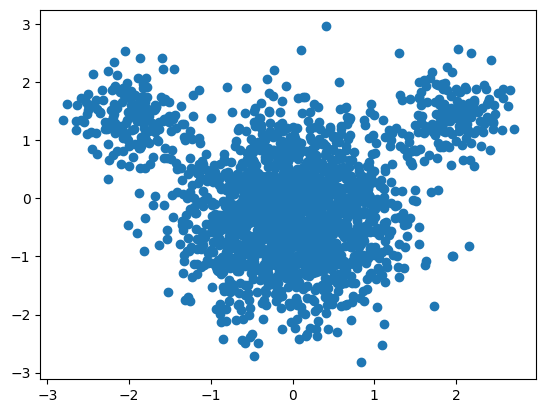

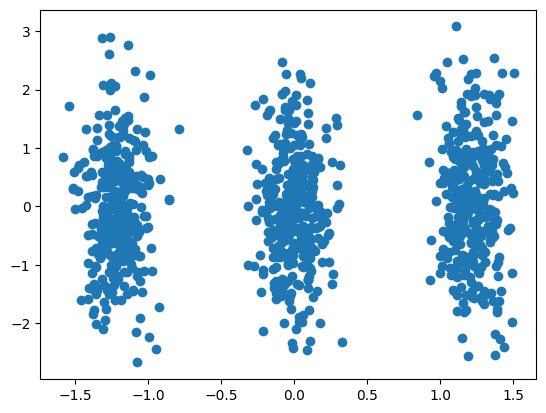

In [4]:
mouse_data = read_file("mouse.csv")
lines_data = read_file("lines.csv")

plot_data(mouse_data)
plot_data(lines_data)


### 4.2 Now, let's try to use k-means on the obtained dataset. Again, you are given a function to visualize the obtained plot. Your task is to use KMeans with propoer parameters on "mouse" and "lines" datasets and see if the clusters generated by k-means are the same that you suggested in the previous exercise.

See documentation and examples: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [5]:
def visualize_clusters(clusters, centroids): 
    #clusters: list of numpy arrays (each array with examples in one cluster)
    #centroids: numpy array
    for c in clusters:
        plt.scatter(c[:,0], c[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='black', s=100)
    plt.show()

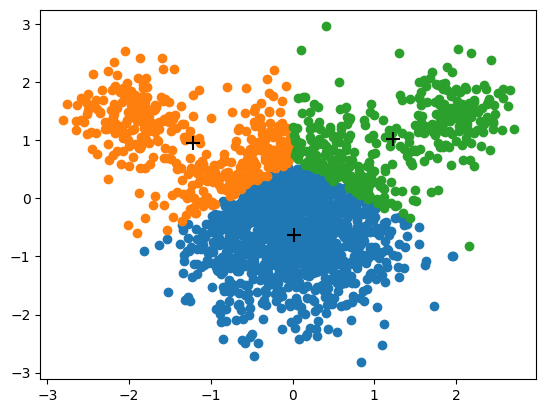

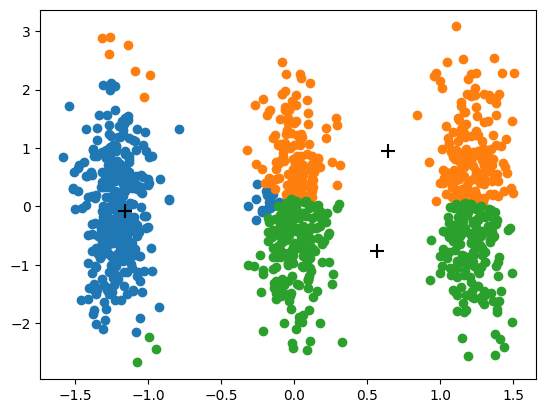

In [6]:
from sklearn.cluster import KMeans

# mouse

kmeans = KMeans(n_clusters=3, random_state=1000).fit(mouse_data)

res = []
for i in range(kmeans.cluster_centers_.shape[0]):
    res.append([])

predicted = kmeans.predict(mouse_data)

for i in range(predicted.shape[0]):
    res[predicted[i]].append(mouse_data[i])

for i in range(len(res)):
    res[i] = np.array(res[i])

visualize_clusters(res, kmeans.cluster_centers_)

# lines

kmeans = KMeans(n_clusters=3, n_init=10).fit(lines_data)

res = []
for i in range(kmeans.cluster_centers_.shape[0]):
    res.append([])

predicted = kmeans.predict(lines_data)

for i in range(predicted.shape[0]):
    res[predicted[i]].append(lines_data[i])

for i in range(len(res)):
    res[i] = np.array(res[i])

visualize_clusters(res, kmeans.cluster_centers_)

# 5. Attribute selection in unsupervised problems

As in unsupervised learning problems (such as clustering) we do not have decision classess, so attribute selection methods based on info gain, chi2 etc. are not applicable here.

**Question** What can we do when we want to reduce the number of features in unsupervised problems?

Możemy:
- policzyć kolerację pomiędzy atrybutami i usunąć nadmiarowe skorelowane
- poprzez ekstrakcję zamienić kilka atrybutów w jeden, który zawiera taką samą informację jak dwa poprzednie ale w krótszej formie

We will try to use two attribute selection methods, which can be used in clustering (unsupervised learning): removing low-variance attributes and removing correlated attributes.

You are given code which reads real-world dataset containing data about customers and saves it in 'data' data frame. 

**Task** Perform attribute selection using the methods above. Firstly, you can use VarianceThreshold class (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). Try different values of threashold and compare how many attributes have been removed. Next, you can use corr() method of DataFrame to obtain the correlation matrix. What can we deduce from this matrix? How can we use it to feature selection? Try to implement proper attribute selection based on correlations.

Można wydedukować, że atrybuty z wysoką absolutną korelacją niosą tą samą informację, więc można się pozbyć jednego z nich.

In [7]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv("customers.csv")
data = data.drop(columns="Address")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [8]:
print("Przed selekcją:")
print(data.columns)
print(data.var())

selector = VarianceThreshold(threshold=20)

new_data = selector.fit_transform(data)

print("\n\nPo selekcji:")
selected_columns = data.columns[selector.get_support()]
new_data = pd.DataFrame(new_data, columns=selected_columns)
print(new_data.columns)
print(new_data.corr())

def reduce_high_correlation(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)
    return df_reduced, to_drop

print("\n\nDruga selekcja po korelacji:")

new_data2, dropped_columns = reduce_high_correlation(data, 0.55)

print(dropped_columns)

print(new_data2.corr())

Przed selekcją:
Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')
Customer Id        60279.166667
Age                   64.664623
Edu                    0.860783
Years Employed        45.939706
Income              1485.566998
Card Debt              4.519210
Other Debt            11.551833
Defaulted              0.193360
DebtIncomeRatio       45.150891
dtype: float64


Po selekcji:
Index(['Customer Id', 'Age', 'Years Employed', 'Income', 'DebtIncomeRatio'], dtype='object')
                 Customer Id       Age  Years Employed    Income  \
Customer Id         1.000000 -0.004447       -0.035146 -0.017675   
Age                -0.004447  1.000000        0.554241  0.476218   
Years Employed     -0.035146  0.554241        1.000000  0.625093   
Income             -0.017675  0.476218        0.625093  1.000000   
DebtIncomeRatio     0.014039  0.008240       -0.033625 -0.035585   

           

# Homework

* Finish all the above tasks in this notebook that you have not finished during class.
* Write your own implementation of k-means algorithm with random centroid initialization and 2 stopping conditions: max iterations and centroid convergence (if all attributes of all centroids changes not more than some epsilon the algorithm should stop). 
* Use your implementation to cluster data about cereal products with their dietary characteristics (cereals.csv, 16 attributes). 
* It contains some nominal attributes (name, mfr, type). You can omit the first two of them. Type attribute is binary, so you can replace it with values 0 and 1.
* Perform the clustering of the cereals into 3 groups using k-means algorithm. 
* Remember to preprocess the data: normalization/standardization, attribute selection. 
* Try to describe the obtained groups based on the characteristics of their centroids. What do all cereals within a certain group have in common?
* Write a **report** containing information about preprocessing methods that you used, number of cereals within each cluster, and your conclusions about the clustering results.


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def distance(a, b):
    return np.linalg.norm(a - b)

class MyKMeans():
    def __init__(self, n_clusters, max_iterations, epsilon, distf):
        self.centroids = np.zeros((n_clusters, 2))
        self.n_clusters = n_clusters
        self.distf = distf
        self.epsilon_mat = np.ones(n_clusters) * epsilon
        self.max_iterations = max_iterations

    def calc_dist(self, points):
        res = np.zeros((points.shape[0], self.n_clusters))
    
        for i in range(points.shape[0]):
            for j in range(self.n_clusters):
                res[i][j] = self.distf(points[i], self.centroids[j])
    
        return res

    def find_groups(self, points):
        groups = self.calc_dist(points).argmin(axis=1)
        new_groups = []
        
        for i in range(self.n_clusters):
            new_groups.append([])
    
        for j in range(groups.shape[0]):
            new_groups[groups[j]].append(points[j])
    
        return new_groups

    def recalc_centroids(self, points):    
        new_groups = self.find_groups(points)
    
        res = np.zeros(self.centroids.shape)
    
        for i in range(self.n_clusters):
            if len(new_groups[i]) > 0:
                res[i] = np.mean(new_groups[i], axis=0)
            else:
                res[i] = np.random.rand(2)
        
        return res

    def show_points(self, points):
        colors = np.random.rand(self.n_clusters, 3)
        
        for i, group in enumerate(self.find_groups(points)):
            if len(group) > 0: 
                group_points = np.array(group)
                plt.scatter(group_points[:,0], group_points[:,1], color=colors[i], label=f"group {i}", edgecolors='black')
        
        for i in range(self.n_clusters):
            plt.scatter(self.centroids[i,0], self.centroids[i,1], color=colors[i], marker='^', edgecolors='black')
        plt.legend()
        plt.show()

    def centroids_distance(self, new_centroids):
        dists = np.zeros(self.n_clusters)
        for i in range(self.n_clusters):
            dists[i] = self.distf(self.centroids[i], new_centroids[i])
        return dists

    def fit(self, points):
        indices = np.random.choice(points.shape[0], size=self.n_clusters, replace=False)
        self.centroids = points[indices]
        
        for i in range(self.max_iterations):
            new_centroids = self.recalc_centroids(points)
            dists = self.centroids_distance(new_centroids)
            self.centroids = new_centroids
            if np.all(dists < self.epsilon_mat):
                break

    def predict(self, points):
        groups = self.calc_dist(points).argmin(axis=1)
        new_groups = []
        
        for i in range(self.n_clusters):
            new_groups.append([])
    
        for j in range(groups.shape[0]):
            new_groups[groups[j]].append(j)
    
        return new_groups

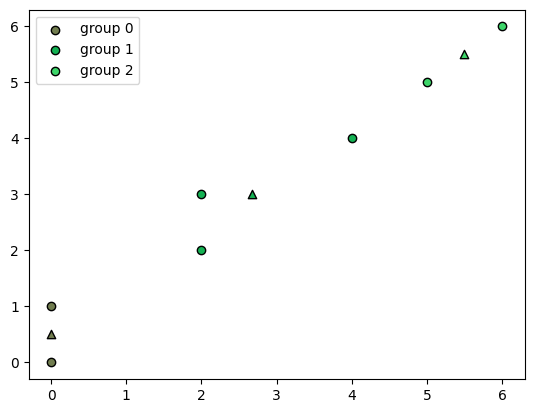

In [10]:
points = np.array([
    [0, 0],
    [0, 1],
    [2, 2],
    [2, 3],
    [4, 4],
    [5, 5],
    [6, 6]
], np.float32)
kmeans = MyKMeans(3, 10000, 0.1, distance)
kmeans.fit(points)
kmeans.show_points(points)

In [11]:
df = pd.read_csv("cereal.csv")
df.drop(["name", "mfr"], axis=1, inplace=True)
df['type'] = df['type'].map({'C': 0, 'H': 1})
df.head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(X_normalized, columns=df.columns)

In [13]:
df_normalized.head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0.0,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.848943,0.25,1.0,0.5,0.064,0.665593
1,0.0,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.410876,0.00,1.0,0.5,0.600,0.210685
2,0.0,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.969789,0.25,1.0,0.5,0.064,0.546941
3,0.0,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,0.25,1.0,0.5,0.200,1.000000
4,0.0,0.545455,0.2,0.4,0.625000,0.071429,0.625000,0.5625,0.000000,0.25,1.0,0.5,0.400,0.215987


In [14]:
df_normalized.var()

type        0.037936
calories    0.031374
protein     0.047943
fat         0.040519
sodium      0.068631
fiber       0.028982
carbo       0.031787
sugars      0.077176
potass      0.046383
vitamins    0.049919
shelf       0.173274
weight      0.022643
cups        0.034660
rating      0.034469
dtype: float64

In [15]:
correl = df_normalized.corr()
correl.where(np.triu(np.ones(correl.shape), k=1).astype(bool))

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
type,NaN,-0.071596,0.269265,-0.002615,-0.321552,-0.078114,-0.123023,-0.285219,-0.079825,-0.180633,-0.131730,-0.039880,0.060057,0.203024
calories,NaN,NaN,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,NaN,NaN,NaN,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,NaN,NaN,NaN,NaN,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,NaN,NaN,NaN,NaN,NaN,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,NaN,NaN,NaN,NaN,NaN,NaN,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.299262,0.320324,0.128405,-0.240544


In [16]:
selector = VarianceThreshold(threshold=0.035)
var_selected = selector.fit_transform(df_normalized)

selected_columns = df_normalized.columns[selector.get_support()]
X_var_selected_df = pd.DataFrame(var_selected, columns=selected_columns)
X_var_selected_df.head()

,type,protein,fat,sodium,sugars,potass,vitamins,shelf
0,0.0,0.6,0.2,0.406250,0.4375,0.848943,0.25,1.0
1,0.0,0.4,1.0,0.046875,0.5625,0.410876,0.00,1.0
2,0.0,0.6,0.2,0.812500,0.3750,0.969789,0.25,1.0
3,0.0,0.6,0.0,0.437500,0.0625,1.000000,0.25,1.0
4,0.0,0.2,0.4,0.625000,0.5625,0.000000,0.25,1.0


In [17]:
corr = X_var_selected_df.corr()
corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

,type,protein,fat,sodium,sugars,potass,vitamins,shelf
type,NaN,0.269265,-0.002615,-0.321552,-0.285219,-0.079825,-0.180633,-0.131730
protein,NaN,NaN,0.208431,-0.054674,-0.329142,0.549407,0.007335,0.133865
fat,NaN,NaN,NaN,-0.005407,0.270819,0.193279,-0.031156,0.263691
sodium,NaN,NaN,NaN,NaN,0.101451,-0.032603,0.361477,-0.069719
sugars,NaN,NaN,NaN,NaN,NaN,0.021696,0.125137,0.100438
potass,NaN,NaN,NaN,NaN,NaN,NaN,0.020699,0.360663
vitamins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.299262
shelf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


potass vs protein ma korelację 0.549407, więc warto usunąć jeden z tych atrybutów.

In [18]:
X_corr_selected_df, dropped_cols = reduce_high_correlation(X_var_selected_df, 0.5)
X_corr_selected_df.head()

,type,protein,fat,sodium,sugars,vitamins,shelf
0,0.0,0.6,0.2,0.406250,0.4375,0.25,1.0
1,0.0,0.4,1.0,0.046875,0.5625,0.00,1.0
2,0.0,0.6,0.2,0.812500,0.3750,0.25,1.0
3,0.0,0.6,0.0,0.437500,0.0625,0.25,1.0
4,0.0,0.2,0.4,0.625000,0.5625,0.25,1.0


In [19]:
X_corr_selected_df.corr()

,type,protein,fat,sodium,sugars,vitamins,shelf
type,1.000000,0.269265,-0.002615,-0.321552,-0.285219,-0.180633,-0.131730
protein,0.269265,1.000000,0.208431,-0.054674,-0.329142,0.007335,0.133865
fat,-0.002615,0.208431,1.000000,-0.005407,0.270819,-0.031156,0.263691
sodium,-0.321552,-0.054674,-0.005407,1.000000,0.101451,0.361477,-0.069719
sugars,-0.285219,-0.329142,0.270819,0.101451,1.000000,0.125137,0.100438
vitamins,-0.180633,0.007335,-0.031156,0.361477,0.125137,1.000000,0.299262
shelf,-0.131730,0.133865,0.263691,-0.069719,0.100438,0.299262,1.000000


In [21]:
X_mat = X_corr_selected_df.to_numpy()
kmeans = MyKMeans(3, 10000, 0.1, distance)
kmeans.fit(X_mat)
kmeans.centroids

array([[0.23076923, 0.47692308, 0.10769231, 0.18389423, 0.17788462,
        0.11538462, 0.34615385],
       [0.        , 0.14666667, 0.17333333, 0.60625   , 0.63333333,
        0.25      , 0.26666667],
       [0.        , 0.38823529, 0.26470588, 0.52481618, 0.49448529,
        0.375     , 1.        ]])

In [90]:
dfs = [df[X_corr_selected_df.columns].iloc[ids] for ids in kmeans.predict(X_mat)]

In [91]:
dfs[0].shape

(12, 7)

In [92]:
dfs[1].shape

(30, 7)

In [93]:
dfs[2].shape

(35, 7)

In [94]:
dfs[0]

,type,protein,fat,sodium,sugars,vitamins,shelf
11,0,6,2,290,1,25,1
20,1,3,0,80,0,0,2
26,0,3,0,0,7,25,2
43,1,4,1,0,3,25,2
54,0,1,0,0,0,0,3
55,0,2,0,0,0,0,3
57,1,5,2,0,-1,0,1
63,0,2,0,0,0,0,1
64,0,3,0,0,0,0,1
65,0,3,0,0,0,0,1


In [95]:
dfs[0].describe()

,type,protein,fat,sodium,sugars,vitamins,shelf
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.250000,3.333333,0.416667,51.250000,1.500000,10.416667,1.666667
std,0.452267,1.614330,0.792961,100.952847,2.467977,12.873216,0.778499
min,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.500000
75%,0.250000,4.250000,0.250000,31.250000,3.000000,25.000000,2.000000
max,1.000000,6.000000,2.000000,290.000000,7.000000,25.000000,3.000000


type
0    9
1    3
Name: count, dtype: int64 -1.0


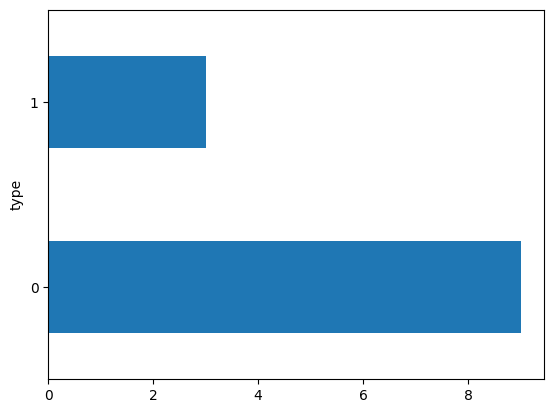

protein
1    1
2    3
3    4
4    1
5    1
6    2
Name: count, dtype: int64 -0.1690308509457033


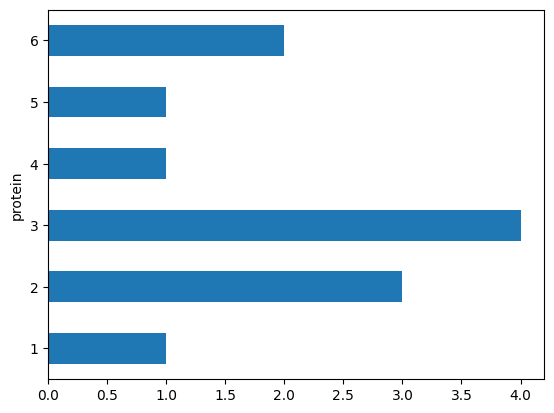

fat
0    9
1    1
2    2
Name: count, dtype: int64 -0.8029550685469661


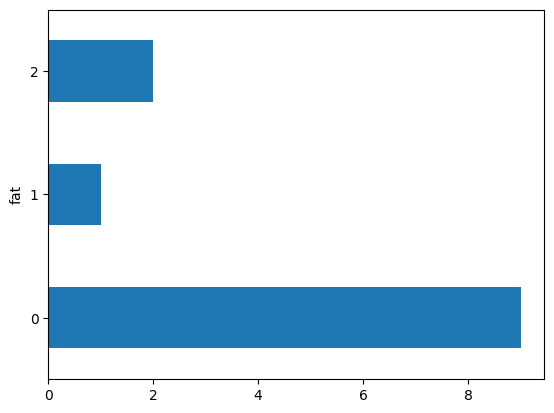

sodium
0      8
15     1
80     1
230    1
290    1
Name: count, dtype: int64 -0.5274357190936317


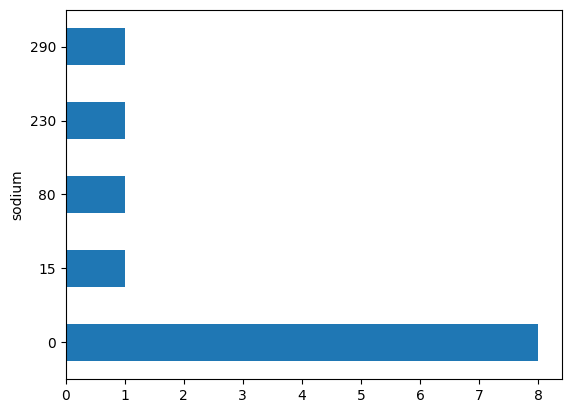

sugars
-1    1
 0    6
 1    1
 3    2
 5    1
 7    1
Name: count, dtype: int64 -0.38933141071383015


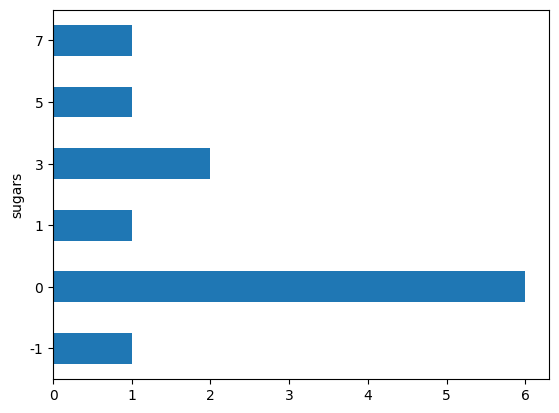

vitamins
0     7
25    5
Name: count, dtype: int64 -0.9999999999999999


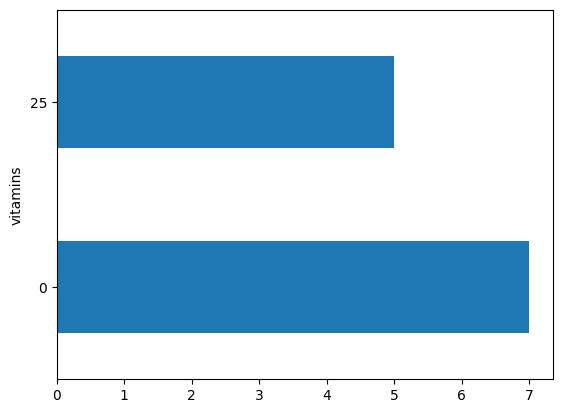

shelf
1    6
2    4
3    2
Name: count, dtype: int64 -1.0


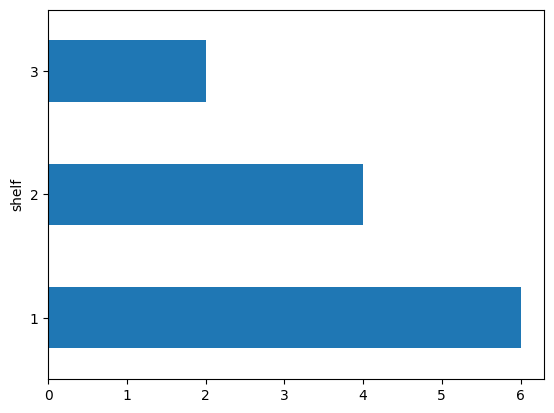

In [125]:
corr = {}
for col in dfs[0].columns:
    vc = dfs[0][col].round(0).value_counts().sort_index()
    corr[col] = [vc.index.to_series().corr(vc)]
    print(vc, corr[col][0])
    vc.plot(kind='barh')
    plt.show()

corr = pd.DataFrame.from_dict(corr)

In [126]:
print("Zbiór 1")
corr

Zbiór 1


,type,protein,fat,sodium,sugars,vitamins,shelf
0,-1.0,-0.169031,-0.802955,-0.527436,-0.389331,-1.0,-1.0


- różne wartości type, przewaga wartości 0
- różne wartości protein, większość <= 3 ale z wyraźnym szczytem na wartości 6
- większość fat = 0
- bardzo znacząca większość sodium = 0, ale pojawiają się pojedyncze przypadki innych wartości
- połowa sugars = 0, duże wzgórze na wartości 0 i małe na wartości 3
- równomierny rozkład vitamins z lekką przewagą 0 (25 albo 0)
- shelf {1,2,3}. Wraz z rosnącą liczbą shelf rośnie ilość przykładów

In [97]:
dfs[1]

,type,protein,fat,sodium,sugars,vitamins,shelf
5,0,2,2,180,10,25,1
6,0,2,0,125,14,25,2
8,0,2,1,200,6,25,1
10,0,1,2,220,12,25,2
12,0,1,3,210,9,25,2
14,0,1,1,180,13,25,2
15,0,2,0,280,3,25,1
16,0,2,0,290,2,25,1
17,0,1,0,90,12,25,2
18,0,1,1,180,13,25,2


In [98]:
dfs[1].describe()

,type,protein,fat,sodium,sugars,vitamins,shelf
count,30.0,30.000000,30.000000,30.00000,30.000000,30.0,30.000000
mean,0.0,1.733333,0.866667,194.00000,9.133333,25.0,1.533333
std,0.0,0.691492,0.730297,62.17883,4.191398,0.0,0.507416
min,0.0,1.000000,0.000000,45.00000,2.000000,25.0,1.000000
25%,0.0,1.000000,0.000000,180.00000,6.000000,25.0,1.000000
50%,0.0,2.000000,1.000000,200.00000,10.500000,25.0,2.000000
75%,0.0,2.000000,1.000000,227.50000,12.000000,25.0,2.000000
max,0.0,3.000000,3.000000,290.00000,15.000000,25.0,2.000000


type
0    30
Name: count, dtype: int64 nan


E:\anaconda3\envs\ml2\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
E:\anaconda3\envs\ml2\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
E:\anaconda3\envs\ml2\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


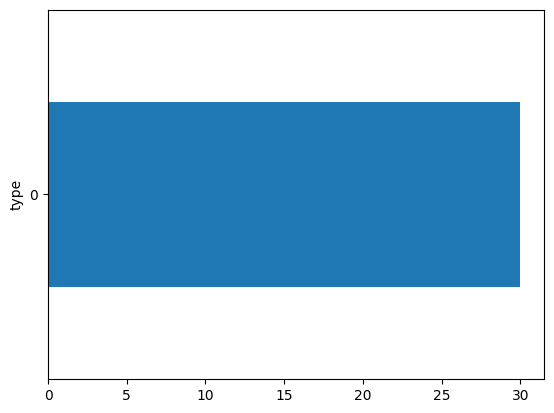

protein
1    12
2    14
3     4
Name: count, dtype: int64 -0.7559289460184544


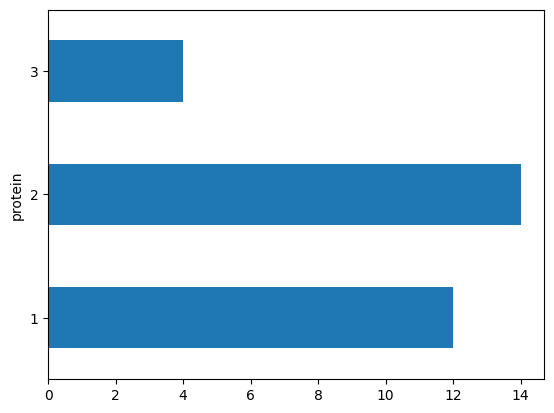

fat
0     9
1    17
2     3
3     1
Name: count, dtype: int64 -0.6825001477017446


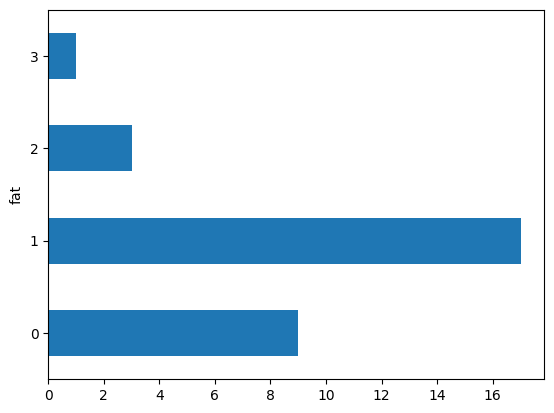

sodium
45     1
70     1
90     1
125    2
135    1
140    1
180    5
190    1
200    4
210    2
220    3
230    1
240    1
250    1
260    1
280    2
290    2
Name: count, dtype: int64 0.1781230341716145


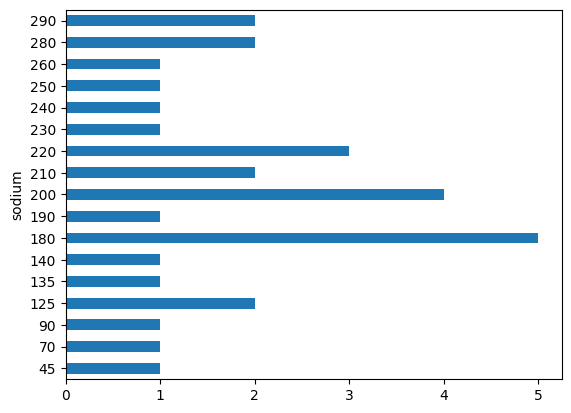

sugars
2     2
3     5
6     2
8     1
9     3
10    2
11    3
12    6
13    3
14    1
15    2
Name: count, dtype: int64 -0.10342481554294157


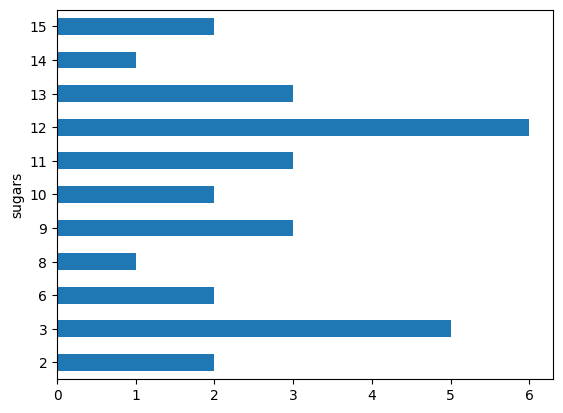

vitamins
25    30
Name: count, dtype: int64 nan


E:\anaconda3\envs\ml2\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
E:\anaconda3\envs\ml2\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
E:\anaconda3\envs\ml2\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


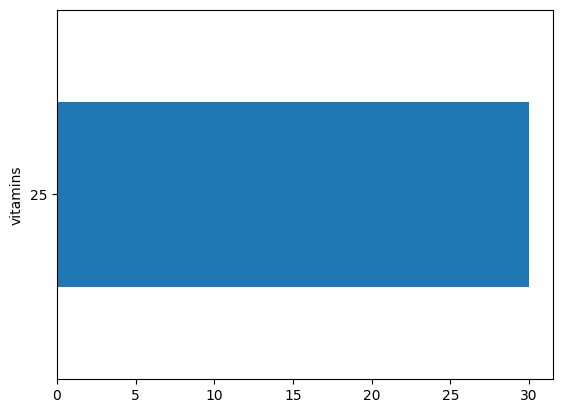

shelf
1    14
2    16
Name: count, dtype: int64 0.9999999999999999


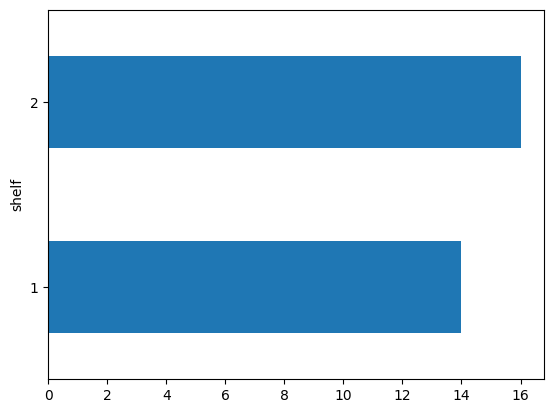

In [127]:
corr = {}
for col in dfs[1].columns:
    vc = dfs[1][col].round(0).value_counts().sort_index()
    corr[col] = [vc.index.to_series().corr(vc)]
    print(vc, corr[col][0])
    vc.plot(kind='barh')
    plt.show()

corr = pd.DataFrame.from_dict(corr)

In [128]:
print("Zbiór 2")
corr

Zbiór 2


,type,protein,fat,sodium,sugars,vitamins,shelf
0,NaN,-0.755929,-0.6825,0.178123,-0.103425,NaN,1.0


- wszystkie type = 0
- przewaga protein <= 2
- większość fat <= 1
- różne wartości sodium
- różne wartości sugars ale dwa szczyty na wartości 3 i 12
- wszystkie wartości vitamins = 25
- shelf = 1 albo 2. Lekka przewaga wartości 2

In [100]:
dfs[2]

,type,protein,fat,sodium,sugars,vitamins,shelf
0,0,4,1,130,6,25,3
1,0,3,5,15,8,0,3
2,0,4,1,260,5,25,3
3,0,4,0,140,0,25,3
4,0,2,2,200,8,25,3
7,0,3,2,210,8,25,3
9,0,3,0,210,5,25,3
13,0,3,2,140,7,25,3
19,0,3,3,140,7,25,3
21,0,2,0,220,3,25,3


In [101]:
dfs[2].describe()

,type,protein,fat,sodium,sugars,vitamins,shelf
count,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.0,2.971429,1.342857,167.428571,6.885714,37.142857,2.971429
std,0.0,0.663578,1.161714,62.159324,3.537791,29.312859,0.169031
min,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.0,3.000000,0.500000,140.000000,4.500000,25.000000,3.000000
50%,0.0,3.000000,1.000000,170.000000,6.000000,25.000000,3.000000
75%,0.0,3.000000,2.000000,200.000000,9.500000,25.000000,3.000000
max,0.0,4.000000,5.000000,320.000000,14.000000,100.000000,3.000000


type
0    35
Name: count, dtype: int64 nan


E:\anaconda3\envs\ml2\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
E:\anaconda3\envs\ml2\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
E:\anaconda3\envs\ml2\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


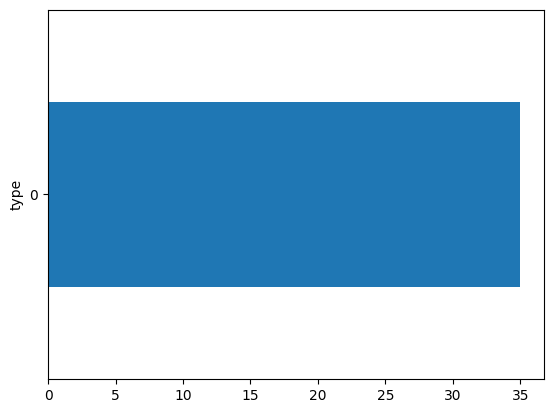

protein
2     8
3    20
4     7
Name: count, dtype: int64 -0.0691163516376137


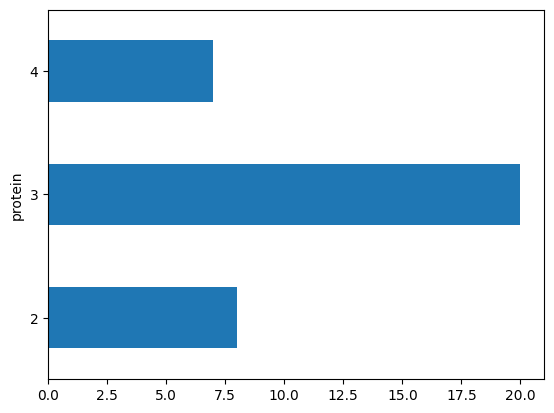

fat
0     9
1    12
2     9
3     4
5     1
Name: count, dtype: int64 -0.8829642006478968


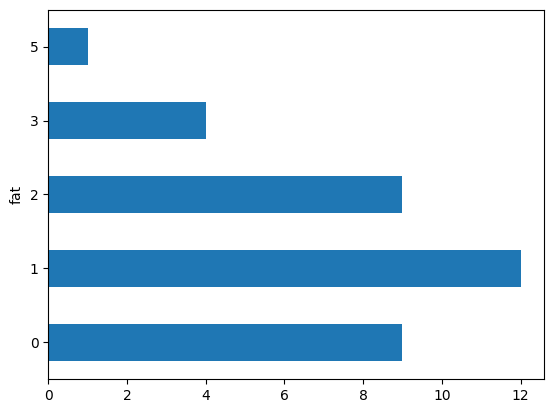

sodium
0      1
15     1
75     1
95     1
130    1
135    1
140    6
150    3
160    1
170    5
190    2
200    4
210    2
220    2
240    1
250    1
260    1
320    1
Name: count, dtype: int64 0.047407521419153664


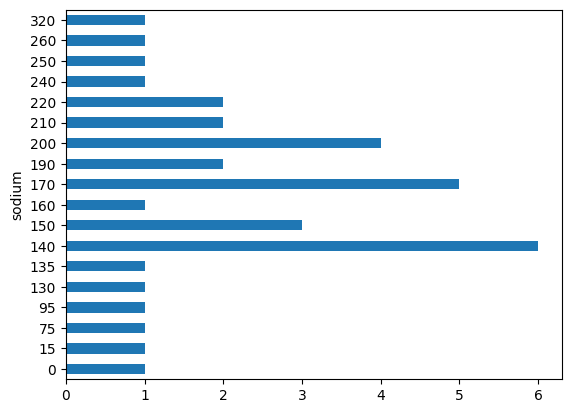

sugars
0     1
2     1
3     6
4     1
5     4
6     5
7     3
8     4
9     1
10    3
11    2
12    1
13    1
14    2
Name: count, dtype: int64 -0.19968416877254608


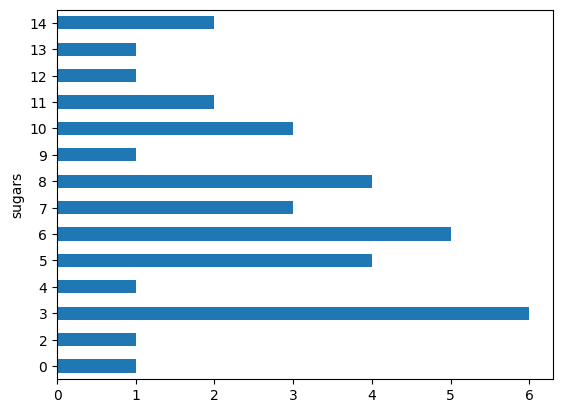

vitamins
0       1
25     28
100     6
Name: count, dtype: int64 -0.10590259563108816


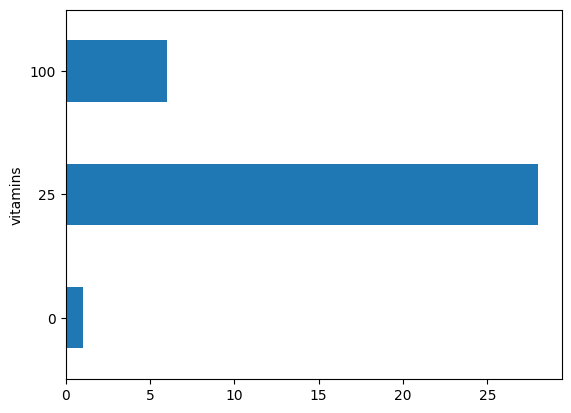

shelf
2     1
3    34
Name: count, dtype: int64 1.0


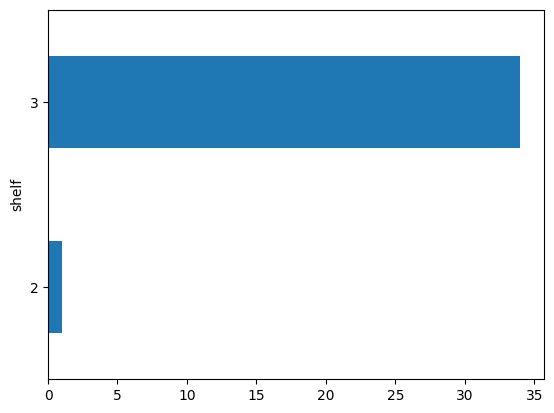

In [129]:
corr = {}
for col in dfs[2].columns:
    vc = dfs[2][col].round(0).value_counts().sort_index()
    corr[col] = [vc.index.to_series().corr(vc)]
    print(vc, corr[col][0])
    vc.plot(kind='barh')
    plt.show()

corr = pd.DataFrame.from_dict(corr)

In [130]:
print("Zbiór 3")
corr

Zbiór 3


,type,protein,fat,sodium,sugars,vitamins,shelf
0,NaN,-0.069116,-0.882964,0.047408,-0.199684,-0.105903,1.0


# Analiza korelacji

Poniżej przedstawione są duplikaty obliczonych komórek korelacji powyżej dla każdego zbioru, żeby wszystko mieć w jednym miejscu:

In [126]:
print("Zbiór 1")
corr

Zbiór 1


,type,protein,fat,sodium,sugars,vitamins,shelf
0,-1.0,-0.169031,-0.802955,-0.527436,-0.389331,-1.0,-1.0


In [128]:
print("Zbiór 2")
corr

Zbiór 2


,type,protein,fat,sodium,sugars,vitamins,shelf
0,NaN,-0.755929,-0.6825,0.178123,-0.103425,NaN,1.0


In [130]:
print("Zbiór 3")
corr

Zbiór 3


,type,protein,fat,sodium,sugars,vitamins,shelf
0,NaN,-0.069116,-0.882964,0.047408,-0.199684,-0.105903,1.0


- wszystkie type = 0
- większość protein = 30, protein <= 3, przeważają niskie wartości
- fat rozkład normalny ze środkiem w wartości 1
- sodium różne wartości, ale widać, że od 14 do 220 liczba zaklasyfikowanych przykładów jest większa
- sugars kompletnie różne wartości
- vitamins prawie wszystkie wartości to 25 z odchyleniem w stronę 100
- shelf znaczna przewaga wartości 3

# Podsumowanie

## Zbiór 1:

- różne wartości type, przewaga wartości 0
- różne wartości protein, większość <= 3 ale z wyraźnym szczytem na wartości 6
- większość fat = 0
- bardzo znacząca większość sodium = 0, ale pojawiają się pojedyncze przypadki innych wartości
- połowa sugars = 0, duże wzgórze na wartości 0 i małe na wartości 3
- równomierny rozkład vitamins z lekką przewagą 0 (25 albo 0)
- shelf {1,2,3}. Wraz z rosnącą liczbą shelf rośnie ilość przykładów

## Zbiór 2:

- wszystkie type = 0
- przewaga protein <= 2
- większość fat <= 1
- różne wartości sodium
- różne wartości sugars ale dwa szczyty na wartości 3 i 12
- wszystkie wartości vitamins = 25
- shelf = 1 albo 2. Lekka przewaga wartości 2

## Zbiór 3:

- wszystkie type = 0
- większość protein = 30, protein >= 3, przeważają niskie wartości
- fat rozkład normalny ze środkiem w wartości 1
- sodium różne wartości, ale widać, że od 14 do 220 liczba zaklasyfikowanych przykładów jest większa
- sugars kompletnie różne wartości
- vitamins prawie wszystkie wartości to 25 z odchyleniem w stronę 100
- shelf znaczna przewaga wartości 3

|          | Zbiór 1                          | Zbiór 2                                | Zbiór 3                             |
| -------- | -------------------------------- | -------------------------------------- | ----------------------------------- |
| type     | różne, przewaga 0                | wszystkie 0                            | wszystkie 0                         |
| protein  | różne, większość <= 3            | {1,2,3}, przewaga <= 2                 | {2,3,4}, przewaga <= 3              |
| fat      | {0, 1, 2}, większość 0           | {0,1,2,3}, większość <= 1              | {0-5}, N(1, 1.16)                   |
| sodium   | znacząca większość 0             | różne                                  | różne                               |
| sugars   | większość = 0                    | różne                                  | kompletnie różne                    |
| vitamins | równomierny rozkład z przewagą 0 | wszystkie 25                           | prawie wszystkie 25 lub 100, mało 0 |
| shelf    | {1,2,3}, tendencja malejąca      | równomierny rozkład {1,2} z przewagą 2 | prawie wszystkie wartości 3         |


# Zbiór 1

Płatki śniadaniowe w zbiorze 1 są jako jedyne różnego typu w porównaniu do reszty; posiadają różną ilość protein ale mają większą wariancję wartości niż pozostałe zbiory; przeważnie zawierają zerową ilość tłuszczów; prawie zawsze zawierają zerową ilość sodu; w większości nie zawierają cukru.

# Zbiór 2

Płatki śniadaniowe w zbiorze 2 są tego samego typu; zawierają małe ilości białka; wszystkie zawierają 25 witamin.

# Zbiór 3

Płatki śniadaniowe w zbiorze 3 są tego samego typu; zawierają małe ilości białka; mają znaczny rozstrzał ilości tłuszczu, ale jego ilość skupia się wokół wartości 0 z lekkim odchyleniem standardowym; prawie wszystkie mają 25 lub 100 witamin, czyli najwięcej z pozostałych zbiorów; prawie wszystkie są na półce numer 3 (czyli wysoko. Zakładam, że shelf to numer pułki, na której są płatki). 

## Dalej

Istnieje ogólna negatywna korelacja pomiędzy ilością płatków a ilością białka, tłuszczu, cukru i witamin, bo mimo, że często małą, to wszystkie zbiory mają negatywną korelację tych atrybutów.